# Lab 3 - Bechdel's Test

## Part 1: Sorting Data for Analysis and Calculating Means

### Introduction:
This lab looks at movies from 1970-2013 and data regarding their production, income, and whether or not it passes the Bechdel Test. The Bechdel Test, named after its creator Allison Bechdel, looks to see if movies pass a seemingly simple condition: two named women characters need to have a conversation regarding something other than men. The purpose of this lab is to see if movies that pass the Bechdel Test have higher or lower incomes than those that fail (or the vice versa).

In order to analyze the budget and gross incomes of the movies, I will make a list for each and organize the data into them. Both of these lists will contain 5 lists within them as well, each pertaining to a potential result from the Bechdel Test: ok, men, no women, no talk, and dubious. In addition, my code will only include data for movies that have a gross income. A handful of movies do not have an income so my code is designed to skip those movies when organizing into the lists. Once the data is organized, I will calculate the means of each list so that the incomes and budgets can be compared. The visual representation of the data is in part 2.

In [34]:
#Import CSV
import csv
x = open("movies.csv", 'r')
dataFile = list(csv.reader(x))

#Import scipy
import scipy.stats as st
import statistics as stat

#Create lists
budgetList = []
incomeList = []

#List of Lists
for x in range(0,5):
    budgetList.append([])
    incomeList.append([])

for x in range(len(dataFile)):
    if dataFile[x][4] == 'ok':
        if dataFile[x][11] != '#N/A':
            incomeList[0].append(dataFile[x][11])
            budgetList[0].append(dataFile[x][10])
    if dataFile[x][4] == 'notalk':
         if dataFile[x][11] != '#N/A':
            incomeList[1].append(dataFile[x][11])
            budgetList[1].append(dataFile[x][10])
    if dataFile[x][4] == 'nowomen':
         if dataFile[x][11] != '#N/A':
            incomeList[2].append(dataFile[x][11])
            budgetList[2].append(dataFile[x][10])
    if dataFile[x][4] == 'men':
         if dataFile[x][11] != '#N/A':
            incomeList[3].append(dataFile[x][11])
            budgetList[3].append(dataFile[x][10])
    if dataFile[x][4] == 'dubious':
         if dataFile[x][11] != '#N/A':
            budgetList[4].append(dataFile[x][10])
            incomeList[4].append(dataFile[x][11])
            
#Convert all data to integers
for x in range(len(budgetList)):
    for z in range(len(budgetList[x])):
        budgetList[x][z] = int(budgetList[x][z])
        incomeList[x][z] = int(incomeList[x][z])

In [35]:
#Calculate Means
#Ok
print("Mean Domestic Income - Passed:", int(stat.mean(incomeList[0])))
print("Mean Budget - Passed", int(stat.mean(budgetList[0])))

#No Talk
print("Mean Domestic Income - No Talk:", int(stat.mean(incomeList[1])))
print("Mean Budget - No Talk:", int(stat.mean(budgetList[1])))

#No Women
print("Mean Domestic Income - No Women:", int(stat.mean(incomeList[2])))
print("Mean Budget - No Women", int(stat.mean(budgetList[2])))

#Men
print("Mean Domestic Income - Men:", int(stat.mean(incomeList[3])))
print("Mean Budget - Men:", int(stat.mean(budgetList[3])))

#Dubious
print("Mean Domestic Income - Dubious:", int(stat.mean(incomeList[4])))
print("Mean Budget - Dubious:", int(stat.mean(budgetList[4])))

Mean Domestic Income - Passed: 79591918
Mean Budget - Passed 46670698
Mean Domestic Income - No Talk: 115113629
Mean Budget - No Talk: 67330808
Mean Domestic Income - No Women: 98906287
Mean Budget - No Women 62866599
Mean Domestic Income - Men: 96691839
Mean Budget - Men: 55324062
Mean Domestic Income - Dubious: 105077222
Mean Budget - Dubious: 60368471


## Part 2: Graphing Budget and Income

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
#Creating two lists that will contain the means for budget and income for each test result
allIncome = []
allBudget = []
for x in range(len(budgetList)):
    allIncome.append(int(stat.mean(incomeList[x])))
    allBudget.append(int(stat.mean(budgetList[x])))

Legend:
0 - Ok (Passed)
1 - No Talk
2 - No Women
3 - Men
4 - Dubious


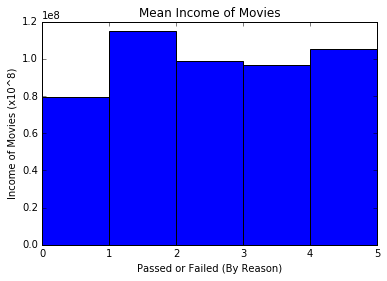

In [37]:
#Bar Graph of Mean Incomes
plt.bar([0,1,2,3,4], allIncome, width=1)
plt.ylim(ymax=120000000)
plt.ylabel("Income of Movies (x10^8)")
plt.xlabel("Passed or Failed (By Reason)")
plt.title("Mean Income of Movies")
print("Legend:")
print("0 - Ok (Passed)")
print("1 - No Talk")
print("2 - No Women")
print("3 - Men")
print("4 - Dubious")

Legend:
0 - Ok (Passed)
1 - No Talk
2 - No Women
3 - Men
4 - Dubious


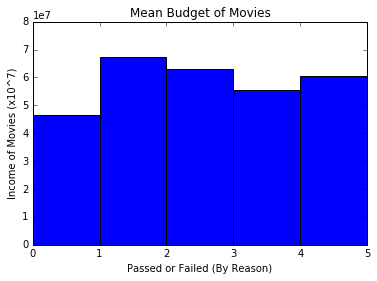

In [38]:
#Bar Graph of Mean Budgets
plt.bar([0,1,2,3,4], allBudget, width=1)
plt.ylim(ymax=80000000)
plt.ylabel("Income of Movies (x10^7)")
plt.xlabel("Passed or Failed (By Reason)")
plt.title("Mean Budget of Movies")
print("Legend:")
print("0 - Ok (Passed)")
print("1 - No Talk")
print("2 - No Women")
print("3 - Men")
print("4 - Dubious")

### Part 2 Discussion
Looking at the bar graphs above, a couple things stand out. Primarily, both graphs have the same distrbution if you in the sense of their order. Both mean budget and mean gross income follows the order - No Talk, No Women, Dubious, Men, and ok - from greatest to least. Most importantly, the average budget and income for every way to fail the test is higher than the average budget and income for movies that pass the test. In addition, the difference between passing movies and the next lowest group of failing movies is larger than any other continuous difference.

As a result, we can conclude that movies that fail the Bechdel Test have lower budgets and lower gross incomes.

## Part 3: Disagreement

Part 3 looks specifically at movies wherein a disagreement has been denoted on the passing or failing of a movie. An example of such a situation is "Gravity" which features a female lead character throughout the movie but doesn't have a conversation with another named female because the vast majority of the film features her alone or with her male astronaut partner. In this example, the movie technically fails the test but there is more to it than simply a binary "pass" or "fail". 

I will utilize a similar orginization tool as I did in part 1 that will two lists with 5 lists each only containing the budget and income for movies whose Bechdel Test results are disagreed. Then I will recreate bar graph graphs to see if disagreement has affected the distribution of budget and income.

In [39]:
#Create New Lists
incomeListDis = []
budgetListDis = []

#List of lists
for x in range(0,5):
    budgetListDis.append([])
    incomeListDis.append([])

#Append data for when movies have disagreement
for x in range(len(dataFile)):
    if dataFile[x][3] == 'ok-disagree':
        if dataFile[x][11] != '#N/A':
            incomeListDis[0].append(dataFile[x][11])
            budgetListDis[0].append(dataFile[x][10])
    if dataFile[x][3] == 'notalk-disagree':
         if dataFile[x][11] != '#N/A':
            incomeListDis[1].append(dataFile[x][11])
            budgetListDis[1].append(dataFile[x][10])
    if dataFile[x][3] == 'nowomen-disagree':
         if dataFile[x][11] != '#N/A':
            incomeListDis[2].append(dataFile[x][11])
            budgetListDis[2].append(dataFile[x][10])
    if dataFile[x][3] == 'men-disagree':
         if dataFile[x][11] != '#N/A':
            incomeListDis[3].append(dataFile[x][11])
            budgetListDis[3].append(dataFile[x][10])
    if dataFile[x][3] == 'dubious-disagree':
         if dataFile[x][11] != '#N/A':
            budgetListDis[4].append(dataFile[x][10])
            incomeListDis[4].append(dataFile[x][11])

In [40]:
#Convert all data to integers
for x in range(len(budgetListDis)):
    for z in range(len(budgetListDis[x])):
        budgetListDis[x][z] = int(budgetListDis[x][z])
        incomeListDis[x][z] = int(incomeListDis[x][z])

#Creating two lists that will contain the means for budget and income for each test result
allIncomeDis = []
allBudgetDis = []
for x in range(len(budgetListDis)):
    allIncomeDis.append(int(stat.mean(incomeListDis[x])))
    allBudgetDis.append(int(stat.mean(budgetListDis[x])))

Legend:
0 - Ok (Passed)
1 - No Talk
2 - No Women
3 - Men
4 - Dubious


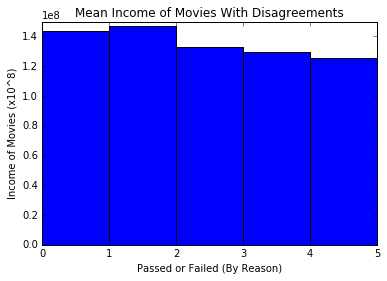

In [41]:
#Bar Graph of Mean Incomes
plt.bar([0,1,2,3,4], allIncomeDis, width=1)
plt.ylim(ymax=150000000)
plt.ylabel("Income of Movies (x10^8)")
plt.xlabel("Passed or Failed (By Reason)")
plt.title("Mean Income of Movies With Disagreements")
print("Legend:")
print("0 - Ok (Passed)")
print("1 - No Talk")
print("2 - No Women")
print("3 - Men")
print("4 - Dubious")

Legend:
0 - Ok (Passed)
1 - No Talk
2 - No Women
3 - Men
4 - Dubious


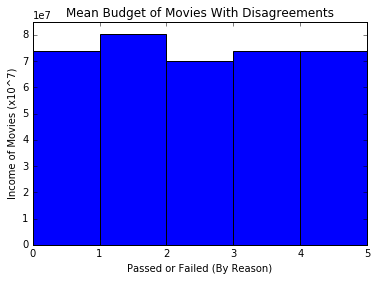

In [42]:
#Bar Graph of Mean Budgets
plt.bar([0,1,2,3,4], allBudgetDis, width=1)
plt.ylim(ymax=85000000)
plt.ylabel("Income of Movies (x10^7)")
plt.xlabel("Passed or Failed (By Reason)")
plt.title("Mean Budget of Movies With Disagreements")
print("Legend:")
print("0 - Ok (Passed)")
print("1 - No Talk")
print("2 - No Women")
print("3 - Men")
print("4 - Dubious")

### Part 3 Discussion:
After analyzing and graphing the budget and income for movies with disagreements, different results are apparent. First, movies that pass the test with disagreements are now have the second highest budget and gross income. This is, of course, drastically different that the results from part 2 where movies that passed the test had the lowest mean budget and gross income. 

As a result, we can conclude there is a clear association between disagreement and mean budget and mean gross income. However, it is not clear whether there is causation. A potential lurking variable that I identified is in regards to which movies people are more likely to find disagreements in. Given that movies that fail the Bechdel Test for any reason have greater gross incomes, more people in general are paying to watch these movies. With more people watching these movies come more people who could potentially disagree with the results of these tests. This would account for the lower budget and income means for most failing data groups because a wider variety of movies (some with very low budgets and incomes and some with very high) are being watched and therefore discussed in general. In contrast, our data from part 2 indicated that movies that pass the test have lower mean incomes so less people are paying to watch them. Therefore, only the really popular movies are getting argued, because those are the movies more people have seen. Having more people see the movie means it has a higher gross income. In addition, a more popular movie is likely popular due to marketing or high-profile casts, both factors that require a larger budget. So while there is an association between the dissagreement and the mean budget and mean income, societal preferences^ can act as a lurking variable.

^ - Societal preferences refers to the fact that more people are watching movies that fail the Bechdel Test than movies that pass. This can be attributed to the sexist culture that is deeply ingrained in our society or to the sad fact that more movies in general fail the Bechdel Test (and these options are certainly not mutually exclusive but, rather, interconnected).